In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock= pd.read_csv(r'C:\Users\USER\Desktop\stock\data\stock.csv')

In [3]:
stock

,Date,Open,High,Low,Close,Volume
0,02-07-2002,21.370001,22.783001,21.370001,22.520000,588615.0
1,03-07-2002,22.267000,22.799999,21.933001,22.733000,162075.0
2,04-07-2002,22.667000,23.333000,22.667000,22.966999,266625.0
3,05-07-2002,23.400000,25.000000,23.333000,24.056999,408600.0
4,08-07-2002,24.003000,24.867001,24.003000,24.503000,165600.0
...,...,...,...,...,...,...
995,05-10-2000,20.415001,20.750000,20.129999,20.205000,465220.0
996,06-10-2000,20.004999,20.150000,19.674999,19.889999,956950.0
997,09-10-2000,19.950001,20.090000,19.809999,19.885000,617280.0
998,10-10-2000,19.985001,19.985001,19.500000,19.600000,1067910.0


In [4]:
stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [5]:
stock.shape

(1000, 6)

In [6]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    999 non-null    object 
 1   Open    999 non-null    float64
 2   High    999 non-null    float64
 3   Low     999 non-null    float64
 4   Close   999 non-null    float64
 5   Volume  999 non-null    float64
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [7]:
stock.isnull().sum()

Date      1
Open      1
High      1
Low       1
Close     1
Volume    1
dtype: int64

In [21]:
stock.fillna(method='ffill',inplace=True)

In [25]:
stock.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [26]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
stock['Date']= label_encoder.fit_transform(stock['Date'])
  
stock['Date'].unique()

array([ 17,  33,  46,  61, 101, 112, 128, 141, 155, 193, 204, 219, 231,
       245, 283, 294, 309, 321, 335, 373, 383, 395,   7,  19,  62,  76,
        92, 103, 114, 156, 169, 184, 195, 206, 246, 259, 274, 285, 296,
       336, 349, 364, 375, 385,  20,  35,  49,  64,  78, 115, 130, 144,
       158, 171, 207, 221, 234, 248, 261, 297, 311, 324, 338, 351, 386,
         9,  22,  37,  51,  94, 105, 117, 132, 145, 186, 197, 208, 222,
       235, 276, 287, 298, 312, 325, 366, 377, 387, 397,  10,  52,  66,
        80,  95, 106, 146, 159, 172, 187, 198, 236, 249, 262, 277, 288,
       326, 339, 352, 367, 378,  23,  38,  53,  67,  81, 118, 133, 147,
       160, 173, 209, 223, 237, 250, 263, 299, 313, 327, 340, 353, 388,
       398,   0,  11,  25,  69,  83,  96, 107, 120, 162, 175, 188, 199,
       211, 252, 265, 278, 289, 301, 342, 355, 368, 379, 390,  27,  41,
        55,  70,  85, 122, 136, 149, 163, 177, 213, 226, 239, 253, 267,
       303, 316, 329, 343, 357,  29,  42,  56,  72,  87, 124, 13

In [27]:
x=stock[['Date','Open','High','Low','Close']]

In [28]:
x

,Date,Open,High,Low,Close
0,17,21.370001,22.783001,21.370001,22.520000
1,33,22.267000,22.799999,21.933001,22.733000
2,46,22.667000,23.333000,22.667000,22.966999
3,61,23.400000,25.000000,23.333000,24.056999
4,101,24.003000,24.867001,24.003000,24.503000
...,...,...,...,...,...
995,65,20.415001,20.750000,20.129999,20.205000
996,79,20.004999,20.150000,19.674999,19.889999
997,116,19.950001,20.090000,19.809999,19.885000
998,131,19.985001,19.985001,19.500000,19.600000


In [29]:
y=stock[['Volume']]

In [30]:
y

,Volume
0,588615.0
1,162075.0
2,266625.0
3,408600.0
4,165600.0
...,...
995,465220.0
996,956950.0
997,617280.0
998,1067910.0


In [31]:
#split the dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [32]:
xtrain.shape

(800, 5)

In [33]:
ytrain.shape

(800, 1)

In [34]:
xtest.shape

(200, 5)

In [35]:
ytest.shape

(200, 1)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(x, y)
ypred=clf.predict(xtest)
score=accuracy_score(ytest,ypred)
print(score)

C:\Users\USER\AppData\Local\Temp/ipykernel_9680/2222216298.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(x, y)


0.985


In [37]:
from sklearn.metrics import accuracy_score
from sklearn import svm
clf = svm.SVC()
clf.fit(x, y)
ypred=clf.predict(xtest)
score=accuracy_score(ytest,ypred)
print(score)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.055


In [38]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression  
clf = LogisticRegression()
clf = clf.fit(x,y)
ypred=clf.predict(xtest)
score=accuracy_score(ytest,ypred)
print(score)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.075


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x,y)
ypred=clf.predict(xtest)
score=accuracy_score(ytest,ypred)
print(score)

1.0


In [40]:
prediction=clf.predict([[17,21.370001,22.783001,21.370001,22.520000]])
print(prediction)

[588615.]


In [41]:
prediction=clf.predict([[399,19.985001,19.985001,19.500000,19.600000]])
print(prediction)

[1067910.]


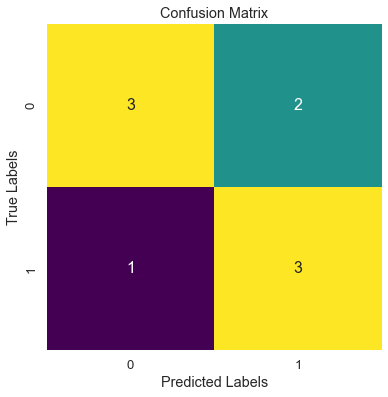

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace y_true and y_pred with your actual data
y_test = [0, 1, 0, 1, 1, 0, 0, 0, 1]
y_pred = [0, 0, 1, 1, 1, 0, 0, 1, 1]

cm = confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix with a different colormap ("viridis")
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

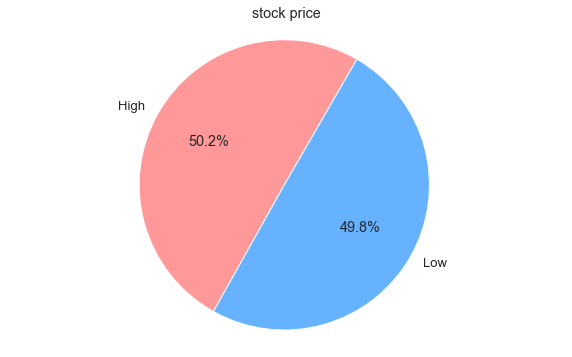

In [43]:
import matplotlib.pyplot as plt

# Sample data
df = ['High','Low']
values = [27.839401,27.603037]  # Corresponding percentages

# Define custom colors for the slices
colors = ['#FF9999', '#66B2FF']  # You can specify the colors you prefer using hex color codes

# Create a pie chart with custom colors
plt.figure(figsize=(10, 6))
plt.pie(values, labels=df, autopct='%1.1f%%', startangle=1500, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Add a title
plt.title('stock price')

# Display the pie chart
plt.show()

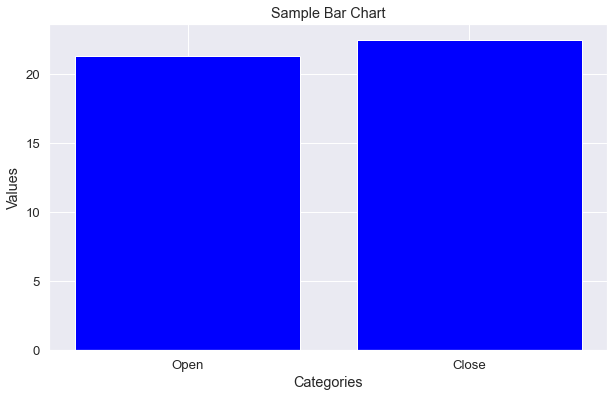

In [46]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Open','Close']
values = [21.370001,22.520000]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='blue')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Sample Bar Chart')

# Display the bar chart
plt.show()

In [47]:
import pickle

In [48]:
# Save the model to a file
filename = r'C:\Users\USER\Desktop\stock\model\stock.pickle'
with open(filename, 'wb') as file:
    pickle.dump(clf, file)

In [49]:
import os
import pickle
if os.path.isfile(r"stock.pkl"):
    print("File Exists")
else:
    pickle.dump(clf,open(r'C:\Users\USER\Desktop\stock\model\stock.pkl','wb'))
    print("Model Loaded!")


Model Loaded!
